In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [5]:
df.shape

(5572, 2)

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

,0
Category,0
Message,0


In [8]:
df.duplicated().sum()

415

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(5157, 2)

# Data cleaning

# convert text into lowercase

In [11]:
df['Message'] = df['Message'].apply(lambda x: x.lower() if isinstance(x,str) else x )

In [12]:
df

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


# remove url

In [13]:
import re

pattern = r"https?://[^\s]+|www\.[^\s]+"

def remove_url(text):
  return re.sub(pattern, '', text)

In [14]:
df['Message'] = df['Message'].apply(remove_url)

# remove other then white space and word

In [15]:
df['Message'] = df['Message'].str.replace(r'[^\w\s]','', regex=True)

In [16]:
df['Message'] = df['Message'].str.replace(r'[\d]','', regex=True)

# Tokenization

In [17]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

df['Message'] =  df['Message'].apply(word_tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Stopword Removal

In [18]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
stopwords = stopwords.words('english')

In [20]:
df['Message'].apply(lambda x : [word for word in x  if word not in stopwords])

,Message
0,"[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, dont, think, goes, usf, lives, around, t..."
...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,..."
5568,"[ü, b, going, esplanade, fr, home]"
5569,"[pity, mood, soany, suggestions]"
5570,"[guy, bitching, acted, like, id, interested, b..."


# Stemming

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(text):
    if isinstance(text, list):
        return [ps.stem(word) for word in text]
    else:
        return text


In [22]:
df['Message'] = df['Message'].apply(stemming)

In [23]:
df['Message']

,Message
0,"[go, until, jurong, point, crazi, avail, onli,..."
1,"[ok, lar, joke, wif, u, oni]"
2,"[free, entri, in, a, wkli, comp, to, win, fa, ..."
3,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,"[nah, i, dont, think, he, goe, to, usf, he, li..."
...,...
5567,"[thi, is, the, nd, time, we, have, tri, contac..."
5568,"[will, ü, b, go, to, esplanad, fr, home]"
5569,"[piti, wa, in, mood, for, that, soani, other, ..."
5570,"[the, guy, did, some, bitch, but, i, act, like..."


# convert into string

In [29]:
df['Message'] = df['Message'].apply(lambda x : ' '.join(x))

# count number of character

In [31]:
df['num_character'] = df['Message'].apply(len)

# EDA

<Axes: xlabel='num_character', ylabel='Density'>

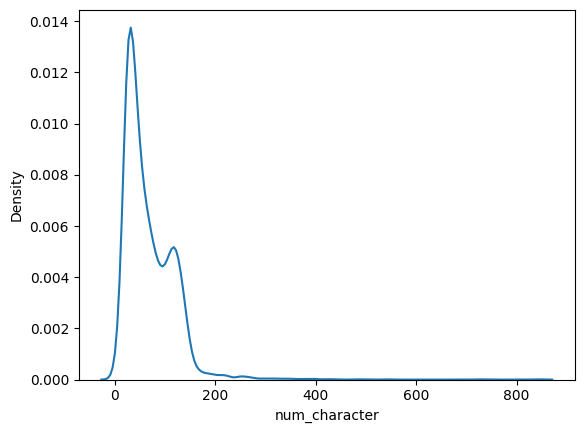

In [37]:
sns.kdeplot(df['num_character'] )

[Text(0, 0, '4516'), Text(0, 0, '641')]

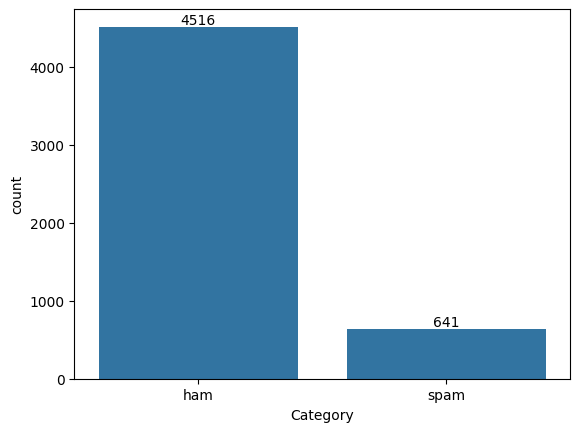

In [24]:
ax = sns.countplot(df,x='Category', legend='auto')
ax.bar_label(ax.containers[0])


In [33]:
df.head()

,Category,Message,num_character
0,ham,go until jurong point crazi avail onli in bugi...,96
1,ham,ok lar joke wif u oni,21
2,spam,free entri in a wkli comp to win fa cup final ...,117
3,ham,u dun say so earli hor u c alreadi then say,43
4,ham,nah i dont think he goe to usf he live around ...,57


<Axes: xlabel='num_character', ylabel='Count'>

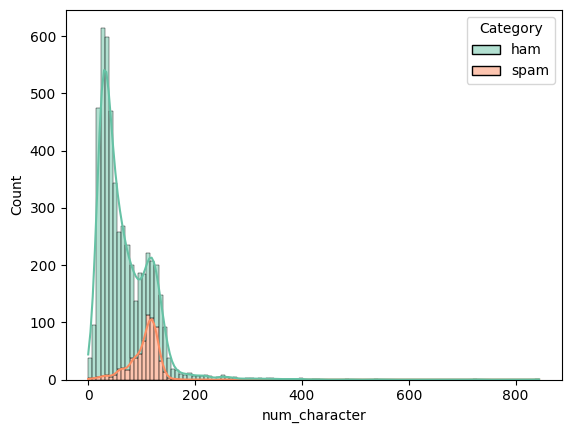

In [48]:
sns.histplot(df,x='num_character', hue='Category' , palette='Set2',multiple='stack',kde=True)

In [55]:
from wordcloud import WordCloud

wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')
ham_wc = wc.generate(df[df['Category'] == 'ham']['Message'].str.cat(sep=' '))

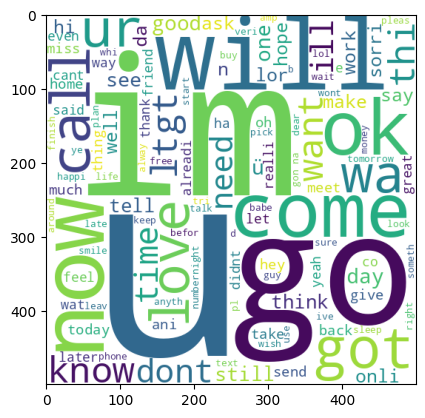

In [51]:
plt.imshow(ham_wc)

In [53]:
spam_wc = wc.generate(df[df['Category'] == 'spam']['Message'].str.cat(sep=' '))

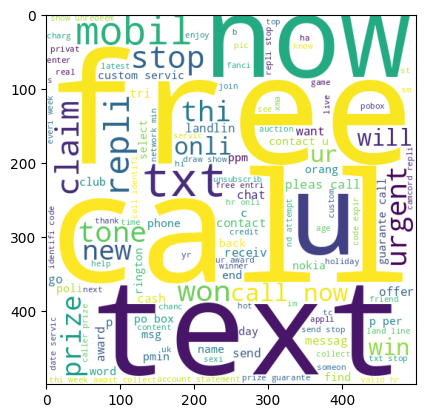

In [54]:
plt.imshow(spam_wc)

In [60]:
from collections import Counter

pd.DataFrame(Counter(" ".join(df[df['Category'] == 'ham']['Message']).split()).most_common(20))

,0,1
0,i,2083
1,you,1777
2,to,1481
3,the,1059
4,a,973
5,u,903
6,it,836
7,and,819
8,in,757
9,me,728


In [61]:
pd.DataFrame(Counter(" ".join(df[df['Category'] == 'spam']['Message']).split()).most_common(20))

,0,1
0,to,580
1,a,326
2,call,315
3,you,248
4,your,248
5,free,185
6,for,182
7,the,177
8,or,156
9,now,155


# Model Building

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [63]:
x = cv.fit_transform(df['Message']).toarray()

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df['Category'])

In [74]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [76]:
x_train.shape

(4125, 7171)

In [77]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB
mNB = MultinomialNB()
gNB = GaussianNB()
bNB = BernoulliNB()

In [78]:
mNB.fit(x_train,y_train)
gNB.fit(x_train,y_train)
bNB.fit(x_train,y_train)

BernoulliNB()

In [83]:
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix

In [85]:
print("multinomial : ",accuracy_score(y_test,mNB.predict(x_test)) , precision_score(y_test,mNB.predict(x_test)))
print("guassian : ",accuracy_score(y_test,gNB.predict(x_test)), precision_score(y_test,gNB.predict(x_test)))
print("bernoulli : ",accuracy_score(y_test,bNB.predict(x_test)), precision_score(y_test,bNB.predict(x_test)))

multinomial :  0.9728682170542635 0.8721804511278195
guassian :  0.8817829457364341 0.511520737327189
bernoulli :  0.9728682170542635 0.9714285714285714


<Axes: >

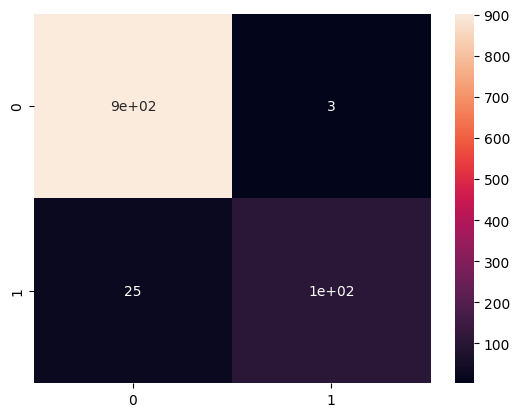

In [89]:
sns.heatmap(confusion_matrix(y_test,bNB.predict(x_test)), annot=True)

In [90]:
import pickle
pickle.dump(bNB,open('model.pkl','wb'))
pickle.dump(cv,open('vectorizer.pkl','wb'))

In [91]:
cv

CountVectorizer()